# Task 2.1 Visualize Quantum Circuits

## Objective: Visualize Quantum Circuits

**Overview:** This notebook covers how to visualize quantum circuits.

There are different ways to visualize quantum circuits using Qiskit's built-in visualization tools. Proper visualization helps in understanding circuit structure, debugging, and presenting quantum algorithms.

In [4]:
# Setup: Import necessary libraries
import numpy as np
from qiskit import QuantumCircuit,QuantumRegister, ClassicalRegister

print("Libraries imported successfully.")

Libraries imported successfully.


## Basic Circuit Creation and Text Visualization

Let's start by creating a simple quantum circuit and visualizing it in text format.

In [5]:
# Build a quantum circuit with 3 quantum bits and 3 classical bits
circuit = QuantumCircuit(3, 3)

# Add quantum gates
circuit.h(0)                    # Pauli-X (NOT) gate on qubit 1
circuit.cx(0, 1)                # CNOT gate with control=0, target=1
circuit.cx(0, 2)                # CNOT gate with control=0, target=2
                
circuit.measure(range(3), range(3))  # Measure all qubits to classical bits

print("Text representation of the circuit:")
print(circuit)

Text representation of the circuit:
     ┌───┐             ┌─┐   
q_0: ┤ H ├──■────■─────┤M├───
     └───┘┌─┴─┐  │  ┌─┐└╥┘   
q_1: ─────┤ X ├──┼──┤M├─╫────
          └───┘┌─┴─┐└╥┘ ║ ┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     1  0  2 


## Default Drawing (Text-based)

The `draw()` method without parameters uses the same text format to represent the circuit. This is useful for quick debugging in terminal environments. 

In [6]:
# Default text-based circuit drawing
print("Text representation:")
circuit.draw()

Text representation:


┌───┐             ┌─┐   
q_0: ┤ H ├──■────■─────┤M├───
     └───┘┌─┴─┐  │  ┌─┐└╥┘   
q_1: ─────┤ X ├──┼──┤M├─╫────
          └───┘┌─┴─┐└╥┘ ║ ┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     1  0  2

## Other Visualizations

For publication-quality circuit diagrams, there are two alternatives one is `mpl` (Matplotlib) output. This provides a clean, professional visualization with proper spacing and styling. and the other is `latex`  LaTex ouput, However it requires installing a spearate package 

Matplotlib visualization:


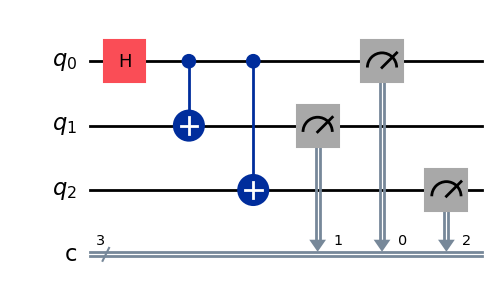

In [7]:
# High-quality visualization using matplotlib
print("Matplotlib visualization:")
circuit.draw(output="mpl")

### Saving the output

The output image can be saved directly to a file and viewed in an image  viewer later.

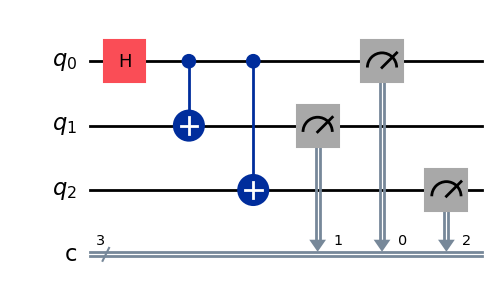

In [8]:
#Save image
circuit.draw(output="mpl", filename="circuit.jpeg")

## More Complex Circuits

Quantum circuits can have multiple quantum and classical registers. This example shows:
- Named registers for better organization
- Barrier operations to separate circuit sections
- Measurement across different registers

circuit with multiple barriers:


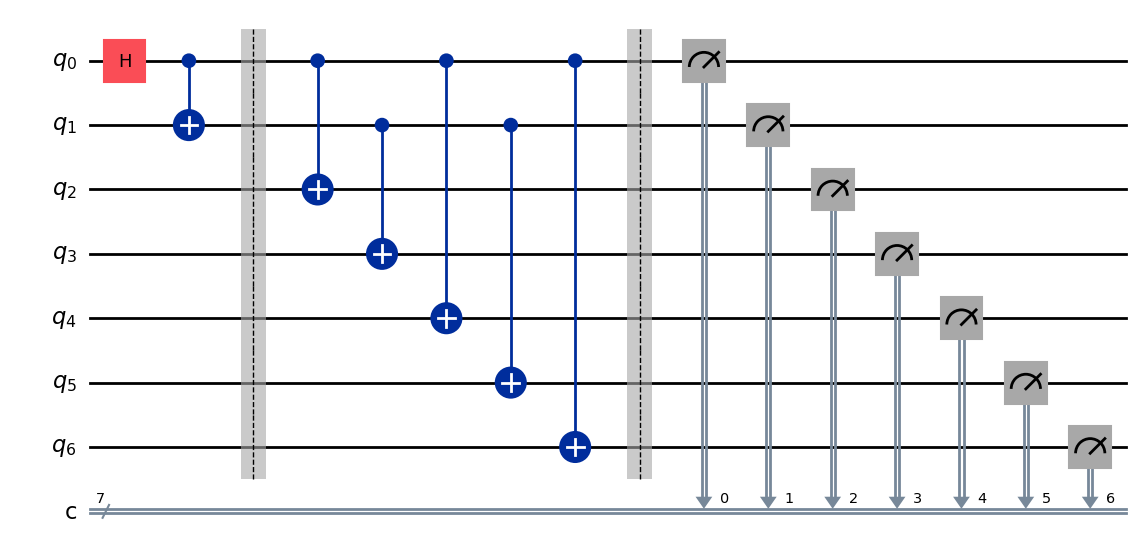

In [9]:
# Create named quantum and classical registers
qreg_q = QuantumRegister(7, 'q')    # Quantum register 'qreq_q' with 7 qubits
creg_c = ClassicalRegister(7, 'c')  # Classical register for measurements from 'creg_c'
 
# Build a more complex circuit
circuit = QuantumCircuit(qreg_q, creg_c)


circuit.h(qreg_q[0])                # Hadamard on qubit 0
circuit.cx(qreg_q[0], qreg_q[1])    # CNOT on qubits 0 and 1
 
# Barrier
circuit.barrier()
 
circuit.cx(qreg_q[0], qreg_q[2])    # CNOT on qubits 0 and 2
circuit.cx(qreg_q[1], qreg_q[3])    # CNOT on qubits 1 and 3

circuit.cx(qreg_q[0], qreg_q[4])    # CNOT on qubits 0 and 4
circuit.cx(qreg_q[1], qreg_q[5])    # CNOT on qubits 1 and 5

circuit.cx(qreg_q[0], qreg_q[6])    # CNOT on qubits 0 and 6

circuit.barrier()
# Measurement phase
circuit.measure(qreg_q, creg_c)     # Measure quantum register 'qreg_q' to classical 'creg_c'


# Draw the complete circuit
print("circuit with multiple barriers:")
circuit.draw(output="mpl")

## Reverse Bit Order

By default, Qiskit uses little-endian notation (qubit 0 at bottom). The `reverse_bits` option changes the display order to match different conventions or personal preference.

Circuit with reversed bit order (qubit 0 at the bottom of the diagram):


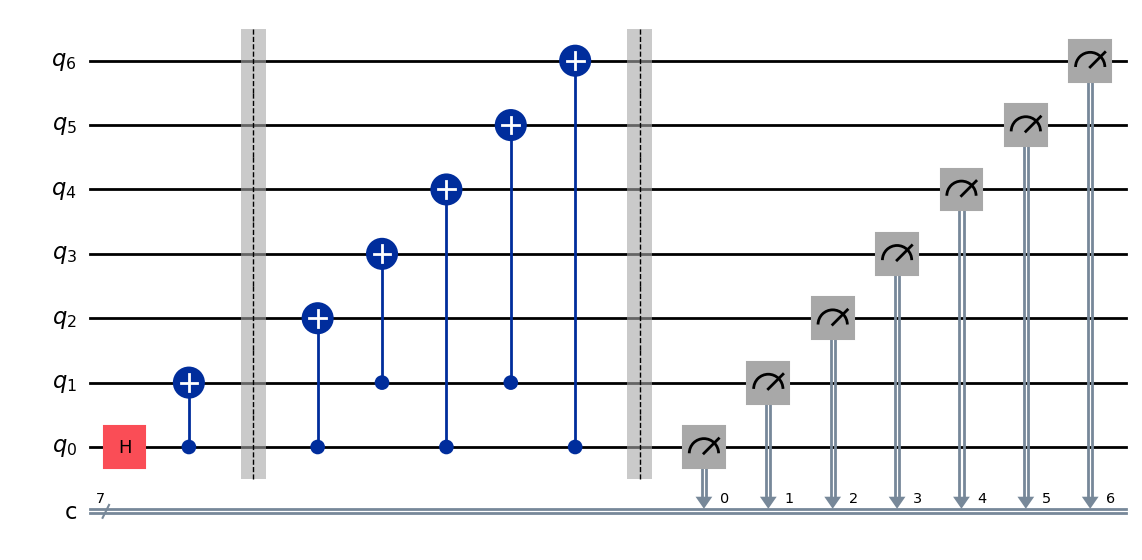

In [10]:
# Draw with reversed bit order (big-endian style)
print("Circuit with reversed bit order (qubit 0 at the bottom of the diagram):")
circuit.draw(output="mpl", reverse_bits=True)

## Hide Barriers

Barriers are useful for circuit compilation and optimization but can be hidden for cleaner visualizations in presentations or publications.

Circuit visualization with barriers hidden:


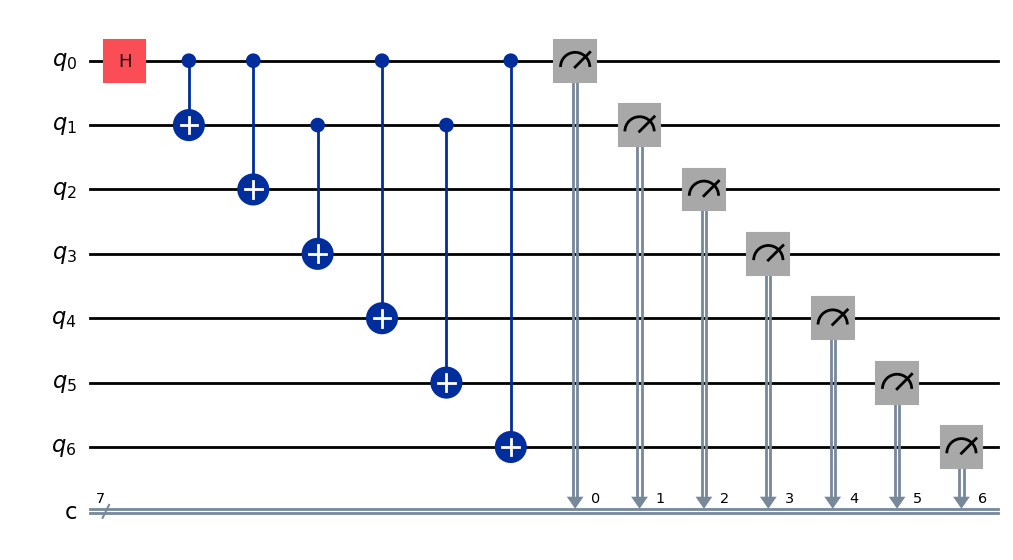

In [11]:
# Draw without showing barrier lines
print("Circuit visualization with barriers hidden:")
circuit.draw(output="mpl", plot_barriers=False)

## Text Output with Line Folding

For circuits with many gates, text output can become very wide. The `fold` parameter limits line length for better readability.

In [12]:
# Display with line folding at 50 characters
print("Text output folded at 50 characters:")
circuit.draw(output="text", fold=50)

Text output folded at 50 characters:


┌───┐      ░                           ░ ┌─┐»
q_0: ┤ H ├──■───░───■─────────■─────────■───░─┤M├»
     └───┘┌─┴─┐ ░   │         │         │   ░ └╥┘»
q_1: ─────┤ X ├─░───┼────■────┼────■────┼───░──╫─»
          └───┘ ░ ┌─┴─┐  │    │    │    │   ░  ║ »
q_2: ───────────░─┤ X ├──┼────┼────┼────┼───░──╫─»
                ░ └───┘┌─┴─┐  │    │    │   ░  ║ »
q_3: ───────────░──────┤ X ├──┼────┼────┼───░──╫─»
                ░      └───┘┌─┴─┐  │    │   ░  ║ »
q_4: ───────────░───────────┤ X ├──┼────┼───░──╫─»
                ░           └───┘┌─┴─┐  │   ░  ║ »
q_5: ───────────░────────────────┤ X ├──┼───░──╫─»
                ░                └───┘┌─┴─┐ ░  ║ »
q_6: ───────────░─────────────────────┤ X ├─░──╫─»
                ░                     └───┘ ░  ║ »
c: 7/══════════════════════════════════════════╩═»
                                               0 »
«                       
«q_0: ──────────────────
«     ┌─┐               
«q_1: ┤M├───────────────
«     └╥┘┌─┐            
«q_2: ─╫─┤M├────────────
«      ║ └╥┘┌─┐         
«q_3: ─╫──╫─┤M├─────────
«      ║  ║ └╥┘┌─┐      
«q_4: ─╫──╫──╫─┤M├──────
«      ║  ║  ║ └╥┘┌─┐   
«q_5: ─╫──╫──╫──╫─┤M├───
«      ║  ║  ║  ║ └╥┘┌─┐
«q_6: ─╫──╫──╫──╫──╫─┤M├
«      ║  ║  ║  ║  ║ └╥┘
«c: 7/═╩══╩══╩══╩══╩══╩═
«      1  2  3  4  5  6

## Styling

Circiut appearence can be changed using the ```style``` paramter in ```draw()``` method, supported style names are "iqp", "iqp-dark", "clifford", "textbook" and "bw" , json files can be be used but it has to specify completely the visualization specifications.

The file is searched for in qiskit/visualization/circuit/styles, the current working directory, and the location specified in ~/.qiskit/settings.conf.

Circuit with black and white styling:


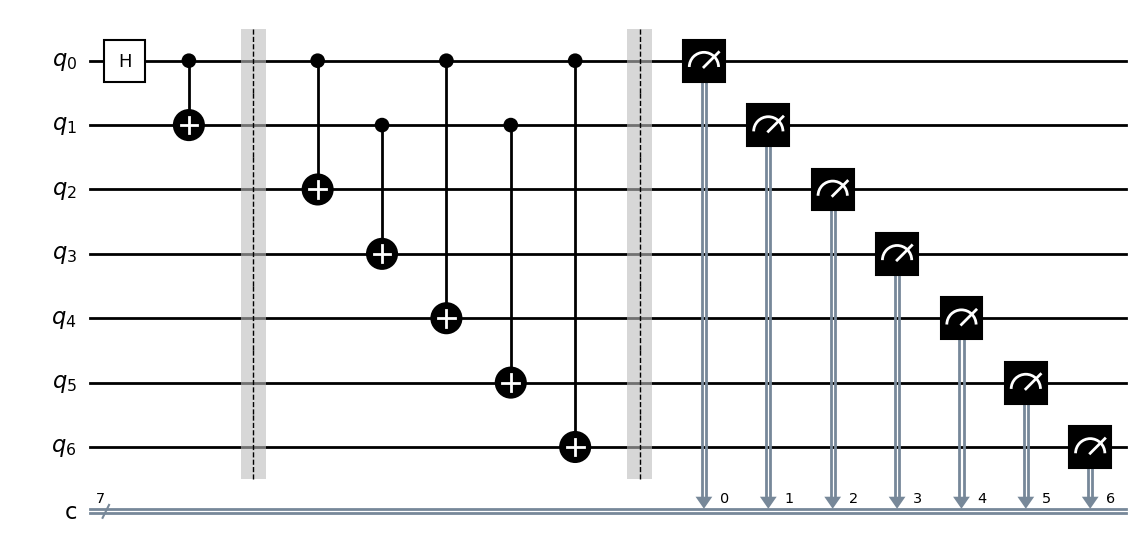

In [13]:
print("Circuit with black and white styling:")
circuit.draw(output="mpl", style="bw")

Qiskit allows extensive customization of circuit appearance through style dictionaries. This is useful for presentations, teaching materials, or matching publication styles.

Circuit with custom styling (light blue background):


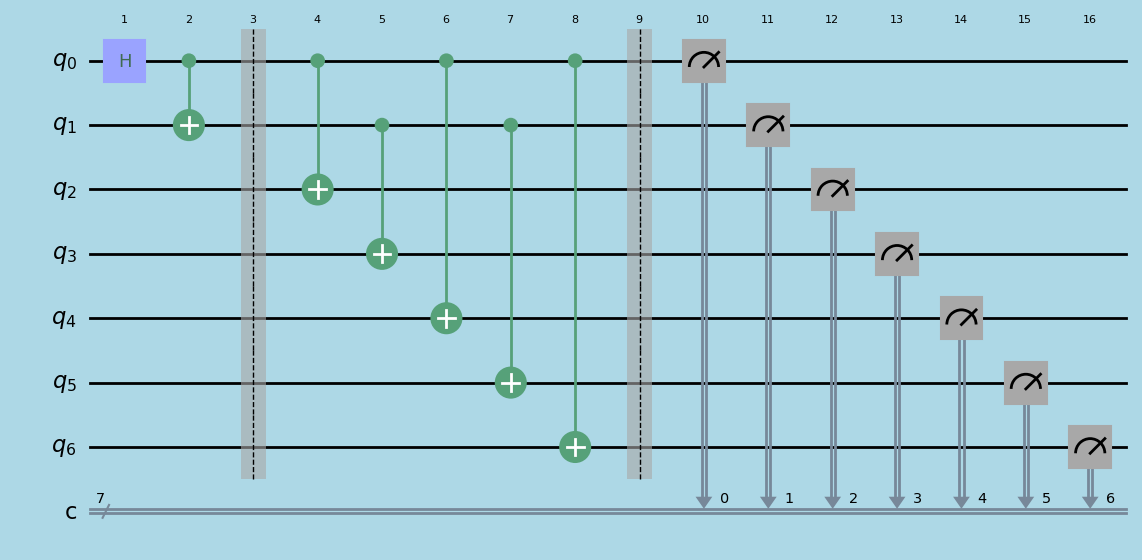

In [14]:
# Custom style dictionary for circuit appearance
style = {
    "backgroundcolor": "lightblue",    # Change background color
    "fold": 40,                         # Fold long circuits
    "showindex": True,                  # Show qubit indices
    "compress": False,                  # Don't compress the visualization
    "displaycolor": {                   # Change Hadamard Gate Color and font color
        "h": [
            "#9AA3FF",
            "#406B51"
        ],
        "cx": [
            "#56A179",
            "#DA8B4F"
        ]
    }
}

print("Circuit with custom styling (light blue background):")
circuit.draw(output="mpl", style=style)

## Scale Control

Adjust the scale of the circuit diagram to fit different display sizes or document constraints.

Circuit scaled to 50% of normal size:


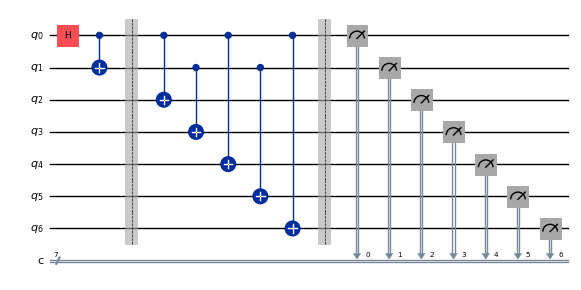

In [15]:
# Scale the circuit to half the normal size
print("Circuit scaled to 50% of normal size:")
circuit.draw(output="mpl", scale=0.5)

## Using circuit_drawer Function

As an alternative to the `draw()` method, you can use the `circuit_drawer` function directly. Both approaches offer the same functionality.

Using circuit_drawer function directly:


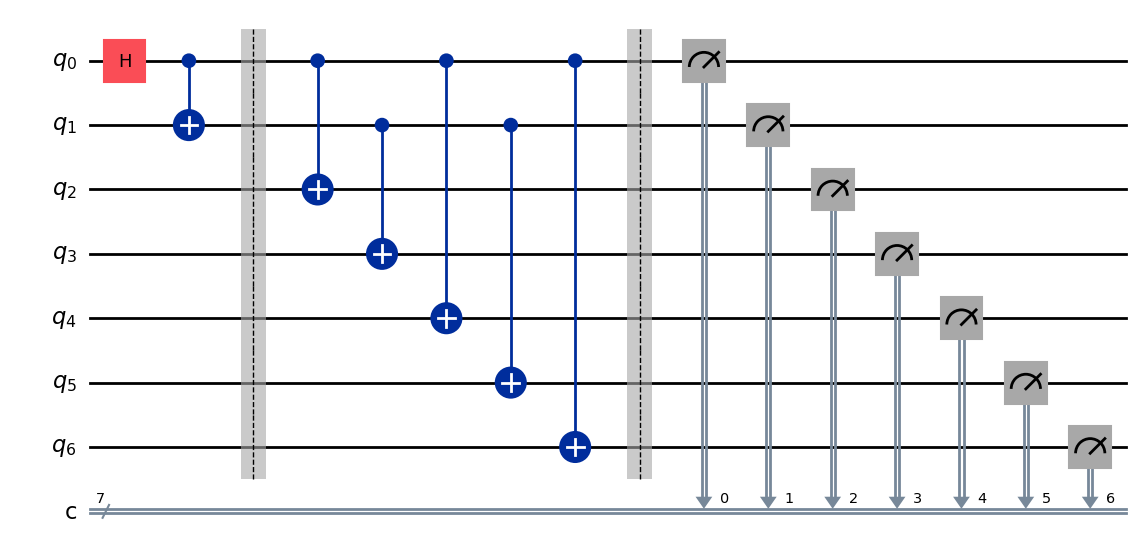

In [16]:
from qiskit.visualization import circuit_drawer
 
# Using the functional interface for circuit drawing
print("Using circuit_drawer function directly:")
circuit_drawer(circuit, output="mpl")

---
## Summary
---

In this notebook, we covered:

## Quantum Circuit Visualizaions:

1. **Can be drawn as** text, mpl or latex and output can saved as image.
2. **have features** like line folding, reverse bits ordering, hiding barriers, custom styling and scaling


---

## Practice Questions

**1) Which parameter in the draw() method would be used to display qubit 0 at the bottom of the circuit diagram instead of the top?**

A) vertical=True

B) qubit_order='reversed'

C) reverse_bits=True

D) little_endian=False

E) display_order='bottom'



***Answer:***
<Details>
<br/>
C) reverse_bits= True is used to reverse bits order
</Details>

---

**2) How can you export a circuit visualization to an image file ?**

A) ```circuit.draw('mpl').save('circuit.png')```

B)  ```circuit.draw(output="mpl", filename="circuit.jpeg")```

C) ```circuit.save('circuit.png')```

D) ```circuit.to_image('mpl')```


***Answer:***
<Details>
<br/>
B) circuit.draw(output="mpl", filename="circuit-mpl.jpeg")
</Details>

---

**3) What happens when you call circuit.draw('mpl', style={'fontColor': '#000000'})?**

A. The background color of the circuit is changed to black

B. The qubit wire color is inverted

C. The code will throw a TypeError because 'fontColor' is not a valid style key

D. The output switches to dark mode automatically


***Answer:***
<Details>
<br/>
C) The code will throw a TypeError because 'fontColor' is not a valid style key
</Details>